In [2]:
!pip list

Package                       Version
----------------------------- --------------------
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
async-generator               1.10
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bitarray                      2.5.1
bkc

In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

boston = load_boston()

bostondf = pd.DataFrame(boston.data, columns = boston.feature_names)

bostondf['PRICE'] = boston.target
print('boston 데이터셋 크기 : ', bostondf.shape)

bostondf.head()

boston 데이터셋 크기 :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

In [18]:
bostondf['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

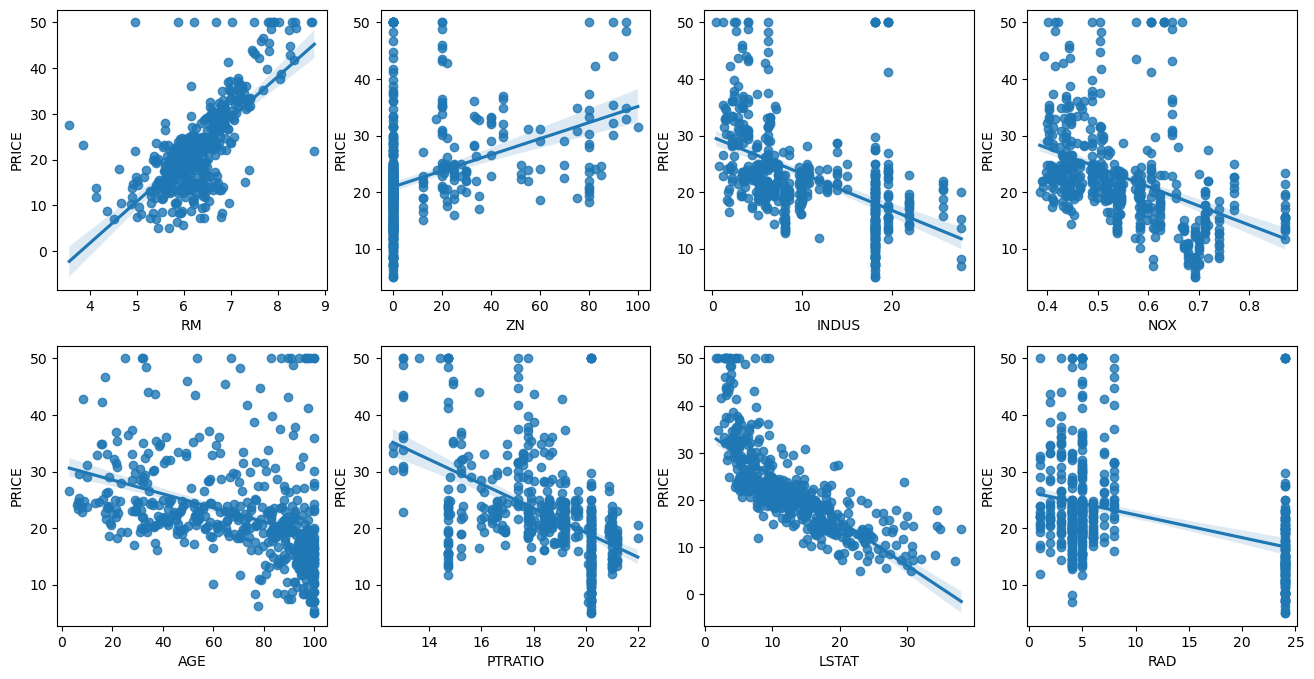

In [26]:
fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', "RAD"]

for i, feature in enumerate(lm_features) :
    row = int(i / 4)
    col = i % 4 
    
    sns.regplot(x = feature, y = 'PRICE', data = bostondf, ax = axs[row][col])
    
fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format = 'tif', dpi = 300, bbox_inches = 'tight')

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostondf['PRICE']
X_data = bostondf.drop(['PRICE'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)


lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('mse : {0:.3f}, rmse : {1:.3f}'.format(mse, rmse))
print('variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

mse : 17.297, rmse : 4.159
variance score : 0.757


In [40]:
print('절편값 : ', lr.intercept_)
print('회귀 계수값 : ', np.round(lr.coef_, 1))

절편값 :  40.99559517216443
회귀 계수값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [41]:
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)

coeff.sort_values(ascending = False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [43]:
from sklearn.model_selection import cross_val_score

y_target = bostondf['PRICE']
X_data = bostondf[['NOX', 'ZN']]
# X_data = bostondf.drop(['PRICE'], axis = 1, inplace = False)

lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds 의 개별 neg mse scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 rmse scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 rmse : {0:.3f}'.format(avg_rmse)) 

5 folds 의 개별 neg mse scores :  [ -40.2   -77.61 -123.71  -85.03  -46.08]
5 folds 의 개별 rmse scores :  [ 6.34  8.81 11.12  9.22  6.79]
5 folds 의 평균 rmse : 8.456


In [50]:
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(4).reshape(2,2)

print(X)

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변형된 2차 다항식 계수 : \n', poly_ftr)

[[0 1]
 [2 3]]
변형된 2차 다항식 계수 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [53]:
def polynomial_func(X) :
    y = 1 + 2 * X[:, 0] + 4 * X[:,0] ** 2 + 4 * X[:, 1] ** 3
#     print(X[:,0])
#     print(X[:,1])
    return y

X = np.arange(0, 4).reshape(2,2)

print('일차 단항식 계수 feature : \n', X, '\n')
y = polynomial_func(X)

print('삼차 다항식 결정값 : \n', y)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]] 

삼차 다항식 결정값 : 
 [  5 129]


In [55]:
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 : \n', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)

print('polynomial 회귀 계수 : \n', np.round(model.coef_, 2))
print('polynomial 회귀 shape : ', model.coef_.shape)

3차 다항식 계수 : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
polynomial 회귀 계수 : 
 [0.   0.19 0.19 0.37 0.56 0.74 0.74 1.12 1.68 2.42]
polynomial 회귀 shape :  (10,)


In [58]:
from sklearn.pipeline import Pipeline

model = Pipeline([('poly', PolynomialFeatures(degree = 3)), ('linear', LinearRegression())])

X = np.arange(4).reshape(2, 2)
y = polynomial_func(X)

model = model.fit(X, y)
print('polynomial 회귀계수', np.round(model.named_steps['linear'].coef_, 2))

polynomial 회귀계수 [0.   0.19 0.19 0.37 0.56 0.74 0.74 1.12 1.68 2.42]



degree 1 회귀계수 [-1.61]
degree 1 mse 0.4077289625098685

degree 4 회귀계수 [  0.47 -17.79  23.59  -7.26]
degree 4 mse 0.04320874987232052

degree 15 회귀계수 [-2.98291000e+03  1.03898880e+05 -1.87415324e+06  2.03715471e+07
 -1.44872830e+08  7.09313489e+08 -2.47065245e+09  6.24559902e+09
 -1.15676336e+10  1.56894743e+10 -1.54005873e+10  1.06457184e+10
 -4.91377255e+09  1.35919593e+09 -1.70380747e+08]
degree 15 mse 181238260.1585483


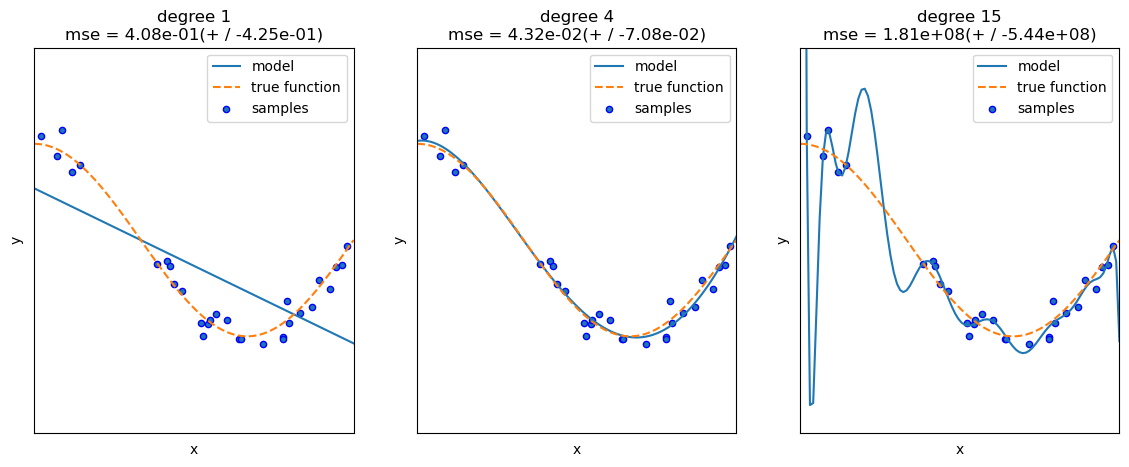

In [63]:
def true_fun(X) :
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)) :
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features', polynomial_features), ('linear_regression', linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = 'neg_mean_squared_error', cv = 10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\ndegree {0} 회귀계수 {1}'.format(degrees[i], np.round(coefficients, 2)))
    print('degree {0} mse {1}'.format(degrees[i], -1 * np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = 'model')
    
    plt.plot(X_test, true_fun(X_test), '--', label = 'true function')
    
    plt.scatter(X, y, edgecolor = 'b', s = 20, label = 'samples')
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc = 'best')
    plt.title('degree {}\nmse = {:.2e}(+ / -{:.2e})'.format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()